#  Implement Bayes Classifier for the ‘MNIST Dataset’ by modeling class conditional densities as

## (a) Multivariate Gaussian distribution


## Loading the MNIST Dataset of digits

In [7]:
pip install tensorflow


Using legacy 'setup.py install' for termcolor, since package 'wheel' is not installed.
    Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\RAZORBLADE\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [13]:
import tensorflow.keras as tk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mnist = tk.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
# length of training data and test data
print(len(x_train), len(x_test))

60000 10000


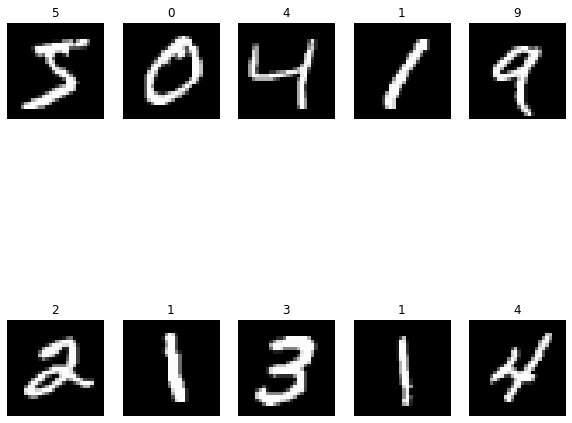

In [16]:
# plot the distribution of data in training for each digit
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")


Text(0.5, 1.0, 'Distribution of training data')

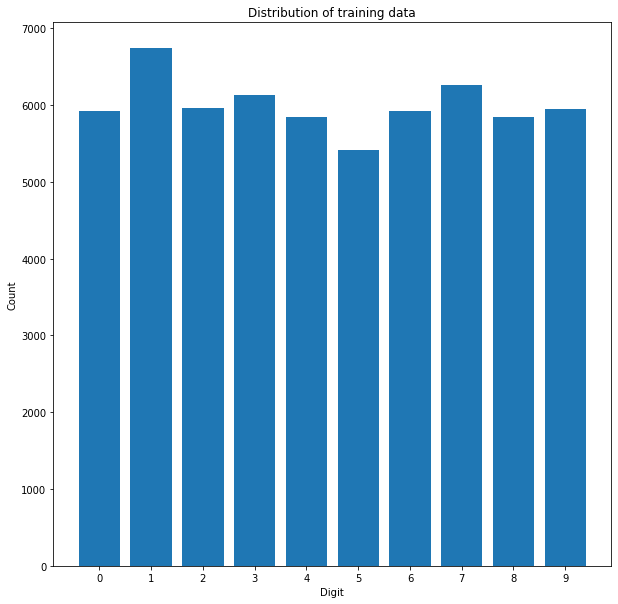

In [23]:
# count the number of each digit in training data and plot the distribution using seaborn
y_train_count = np.bincount(y_train)
plt.figure(figsize=(10,10))
plt.bar(range(10), y_train_count)
plt.xticks(range(10))
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Distribution of training data")


# Priors

In [26]:
# calculate priors for each digit
priors = y_train_count / len(y_train)
print(priors)

[0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]


In [33]:
# resize the training and testing data from (60,000, 28, 28) to (60,000, 784) and convert in dataframe
x_train = x_train.reshape(60000, 784)
x_train_df = pd.DataFrame(x_train)
x_test = x_test.reshape(10000, 784)
x_test_df = pd.DataFrame(x_test)
x_test_df.head()



,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# normalising the data
# we will normalise the data by dividing each pixel value by 255
# this will make the data values between 0 and 1
x_train_df = x_train_df / 255
x_test_df = x_test_df / 255
x_train = x_train_df.values
x_test = x_test_df.values
x_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(-0.5, 27.5, 27.5, -0.5)

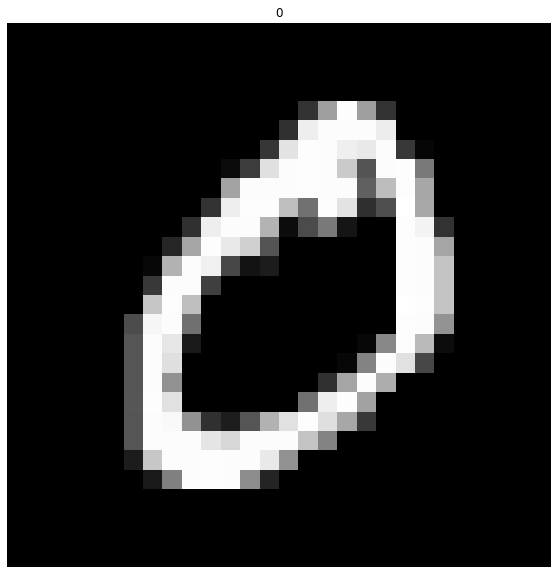

In [39]:
# plot the first image from x_train_df
plt.figure(figsize=(10,10))
plt.imshow(x_train[1].reshape(28,28), cmap="gray")
plt.title(y_train[1])
plt.axis("off")


# CCD as  multivariate Gaussian

## Fitting Gaussian to MNIST

Assume each image comes from a multivariate  (784-dimensional) Gaussian distribution 

Assume in each class j,Pj (x) the conditional distribution is Gaussian with mean and covariance matrix
where dimension of µj is 784 and covariance matrix is 784*784

## Calculating for each class j
$$\mu_{j}


In [43]:
# calculate the mu for each digit via the sample mean of the examples in each digit class
mu = np.zeros((10, 784))
for i in range(10):
    mu[i] = np.mean(x_train[y_train == i], axis=0)
# display mu as dataframe with each row representing a digit
mu_df = pd.DataFrame(mu)
mu_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Covariance matrix for each class

In [92]:
# # Estimate covariance matrix via the sample covariance of the examples in each digit class
# sigma = np.zeros((10, 784, 784))
# for i in range(10):
#     sigma[i] = np.cov(x_train[y_train == i].T)
# # display sigma as dataframe with each row representing a digit

In [91]:
print(sigma[0][300][300], sigma[0][400][300])

2.579513667023822e-06 3.806814221880845e-07


# Need for Regularization

In [99]:
# regualarise the covariance matrix
# we will add a small number to the diagonal of the covariance matrix to regularise the covariance matrix
sigma_reg = np.zeros((10, 784, 784))

for i in range(10):
    temp_diag = np.zeros((784, 784))
    for j in range(784):
        t = x_train[:,j]
        # calculate variance of t
        var = np.var(t)
        temp_diag[j][j] = var +     0.01
    sigma_reg[i] = np.cov(x_train[y_train == i].T) + temp_diag 
sigma = sigma_reg


# Condiitional Log Likelihood

In [100]:
# calculate conditional log likelihood 
def cll(x,j):
    # get the inverse of the covariance matrix for the digit j
    sigma_inv = np.linalg.inv(sigma[j])
    # calculate the determinant of the covariance matrix for the digit j
    sigma_det = np.linalg.det(sigma[j])
    # calculate the log of the determinant of the covariance matrix for the digit j
    sigma_det_log = np.log(sigma_det)
    # calculate the difference between the data and the mean for the digit j
    diff = x - mu[j]
    # calculate the dot product of the difference and the inverse of the covariance matrix for the digit j
    diff_sigma_inv = np.dot(diff, sigma_inv)
    diff_sigma_inv = np.dot(diff_sigma_inv, diff.T)
    # calculate the log of the conditional likelihood for the digit j
    cll = -0.5 * (diff_sigma_inv + sigma_det_log + 784 * np.log(2 * np.pi))
    return cll
    
    

In [101]:
def predict(x):
    # calculate the log of the conditional likelihood for each digit
    cll_list = [cll(x,j) for j in range(10)]
    # return the index of the digit with the highest log of the conditional likelihood
    return np.argmax(cll_list)

In [102]:
def predict_batch(x_test):
    pred = []
    for x in x_test:
        pred.append(predict(x))
    return np.array(pred)
       

In [103]:
y_pred = predict_batch(x_test)
# calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)

C:\Users\RAZORBLADE\AppData\Local\Temp\ipykernel_11504\3745535613.py:8: RuntimeWarning: divide by zero encountered in log
  sigma_det_log = np.log(sigma_det)


# Gaussian model classifier